In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [67]:
data = pd.read_csv('dataset.csv')

In [68]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [69]:
data.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [70]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [71]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


track_genre
pop-film          59283
k-pop             56896
chill             53651
sad               52379
grunge            49594
                  ...  
chicago-house     12339
detroit-techno    11174
latin              8297
romance            3245
iranian            2210
Name: popularity, Length: 114, dtype: int64


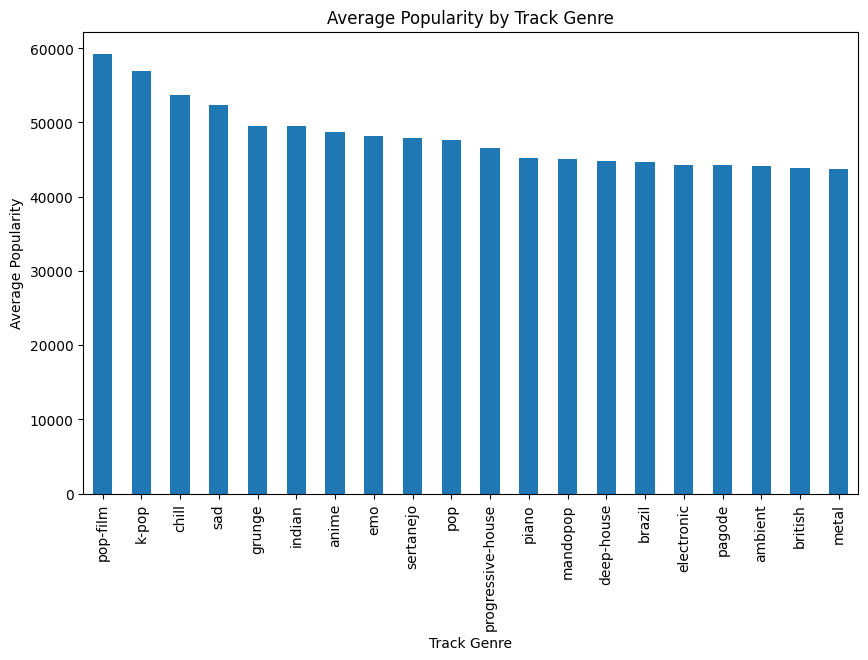

In [72]:
genre_popularity = data.groupby('track_genre').popularity.sum().sort_values(ascending=False)
print(genre_popularity)

genre_popularity.head(20).plot(kind='bar', figsize=(10, 6), title='Average Popularity by Track Genre')
plt.xlabel('Track Genre')
plt.ylabel('Average Popularity')
plt.show()

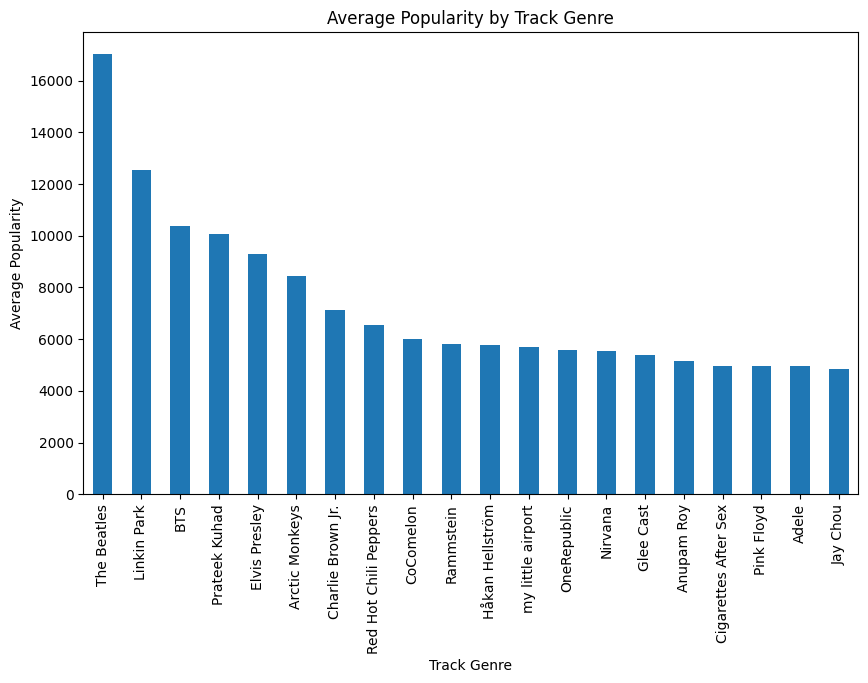

In [73]:
artist_popularity = data.groupby('artists').popularity.sum().sort_values(ascending=False)

artist_popularity.head(20).plot(kind='bar', figsize=(10, 6), title='Average Popularity by Track Genre')
plt.xlabel('Track Genre')
plt.ylabel('Average Popularity')
plt.show()

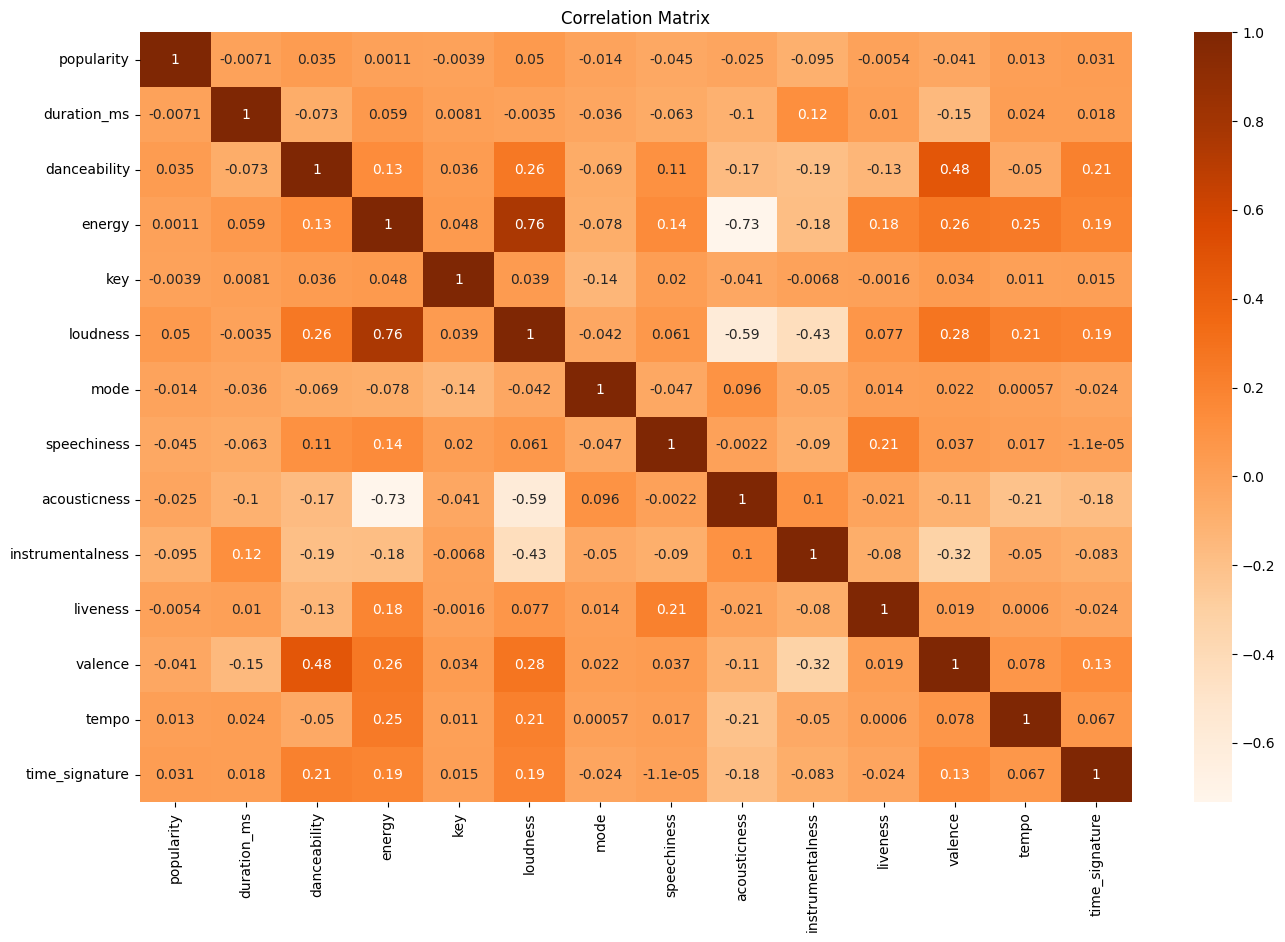

In [74]:
numeric_data = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges')
plt.title('Correlation Matrix')
plt.show()

In [29]:
data['artists'] = data['artists'].fillna('Unknown')
data['album_name'] = data['album_name'].fillna('Unknown')
data['track_name'] = data['track_name'].fillna('Unknown')

In [57]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("dataset.csv")  # Change the path if necessary

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 0", "track_id", "artists", "album_name", "track_name"])

# Convert categorical columns
df["explicit"] = df["explicit"].astype(int)  # Convert boolean to int
df = pd.get_dummies(df, columns=["track_genre"], drop_first=True)  # One-hot encode genre

# Define features and target variable
X = df.drop(columns=["popularity"])
y = df["popularity"]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Neural Network Model
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the model
model = keras.Sequential([
    layers.Dense(256, kernel_regularizer=regularizers.l2(0.01)),  # More neurons
    layers.BatchNormalization(),  # Normalizes activations
    layers.LeakyReLU(alpha=0.1),  # Avoids vanishing gradients
    
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.01)),  
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.3),  # Prevents overfitting
    
    layers.Dense(32, kernel_regularizer=regularizers.l2(0.01)),  
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.1),
    
    layers.Dense(1)  # Output layer for regression
])

# Compile model with AdamW optimizer & lower learning rate
model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.001), loss="mse", metrics=["mae"])

# Callbacks for better training
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=80, batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])


# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


Epoch 1/80
2850/2850 [==============================] - 6s 2ms/step - loss: 541.7556 - mae: 17.4449 - val_loss: 363.3626 - val_mae: 13.7722 - lr: 0.0010
Epoch 2/80
2850/2850 [==============================] - 5s 2ms/step - loss: 373.6271 - mae: 14.1752 - val_loss: 357.0785 - val_mae: 13.5316 - lr: 0.0010
Epoch 3/80
2850/2850 [==============================] - 5s 2ms/step - loss: 367.9168 - mae: 14.0003 - val_loss: 356.8503 - val_mae: 13.3915 - lr: 0.0010
Epoch 4/80
2850/2850 [==============================] - 5s 2ms/step - loss: 365.4114 - mae: 13.9088 - val_loss: 352.8946 - val_mae: 13.4865 - lr: 0.0010
Epoch 5/80
2850/2850 [==============================] - 5s 2ms/step - loss: 362.8283 - mae: 13.8167 - val_loss: 352.8297 - val_mae: 13.4242 - lr: 0.0010
Epoch 6/80
2850/2850 [==============================] - 5s 2ms/step - loss: 359.8691 - mae: 13.7332 - val_loss: 353.1061 - val_mae: 13.3002 - lr: 0.0010
Epoch 7/80
2850/2850 [==============================] - 5s 2ms/step - loss: 358.77

713/713 [==============================] - 1s 804us/step


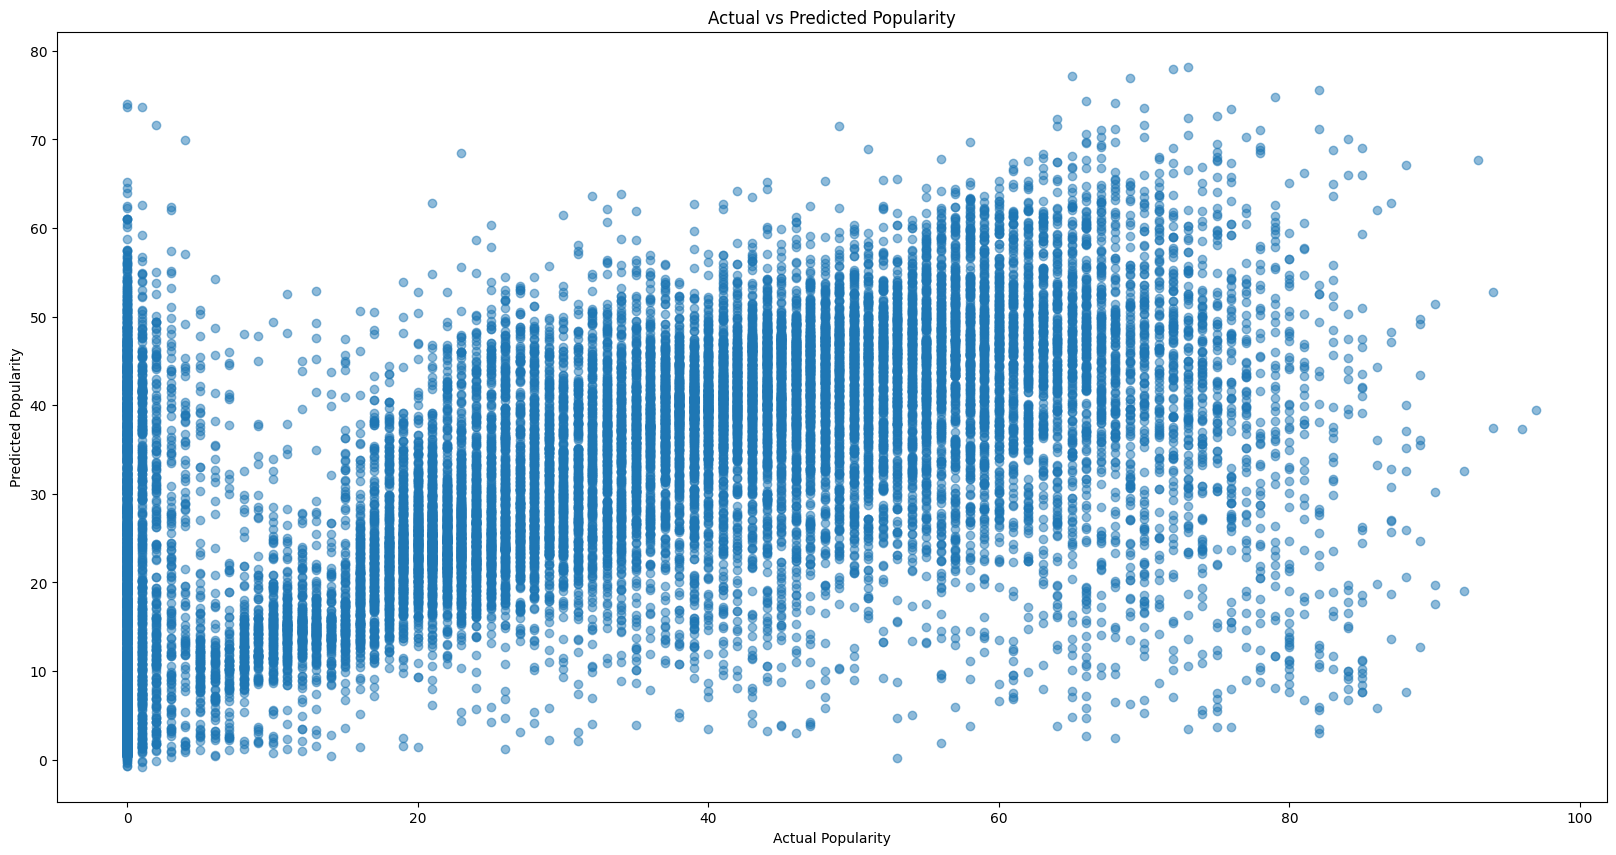

In [58]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)

# Plot actual vs predicted\
plt.figure(figsize=(20, 10))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Popularity")
plt.show()


In [59]:
# Select a few songs from the test set
sample_songs = X_test[:5]

# Predict popularity
predicted_popularities = model.predict(sample_songs)

# Display results
for i, pred in enumerate(predicted_popularities):
    print(f"Song {i+1}: Predicted Popularity = {pred[0]}, Actual Popularity = {y_test.iloc[i]}")


1/1 [==============================] - 0s 15ms/step
Song 1: Predicted Popularity = 46.55741882324219, Actual Popularity = 50
Song 2: Predicted Popularity = 13.798296928405762, Actual Popularity = 11
Song 3: Predicted Popularity = 1.3477524518966675, Actual Popularity = 0
Song 4: Predicted Popularity = 3.9535796642303467, Actual Popularity = 0
Song 5: Predicted Popularity = 23.652162551879883, Actual Popularity = 57


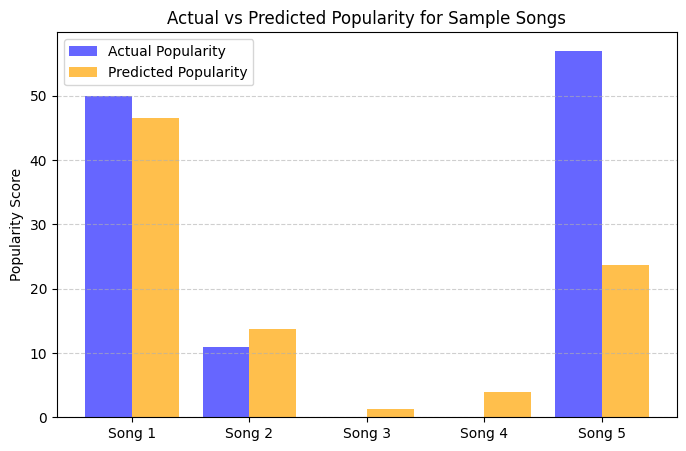

In [60]:
actual_popularities = y_test.iloc[:5].values

plt.figure(figsize=(8, 5))
x_labels = [f"Song {i+1}" for i in range(5)]
x = range(5)

plt.bar(x, actual_popularities, width=0.4, label="Actual Popularity", color="blue", alpha=0.6)
plt.bar([i + 0.4 for i in x], [pred[0] for pred in predicted_popularities], width=0.4, label="Predicted Popularity", color="orange", alpha=0.7)

plt.xticks([i + 0.2 for i in x], x_labels)
plt.ylabel("Popularity Score")
plt.title("Actual vs Predicted Popularity for Sample Songs")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


In [61]:
model.save("spotify_popularity_model.h5")


c:\Users\Shlok Sonkusare\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


713/713 [==============================] - 1s 791us/step
Mean Absolute Error (MAE): 12.32
Mean Squared Error (MSE): 316.31
Root Mean Squared Error (RMSE): 17.79
R² Score: 0.36


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a threshold (e.g., popularity > 50 is "popular", else "not popular")
threshold = 50
y_test_class = (y_test > threshold).astype(int)   # Actual classes
y_pred_class = (y_pred.flatten() > threshold).astype(int)   # Predicted classes

# Compute classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.80
Precision: 0.71
Recall: 0.27


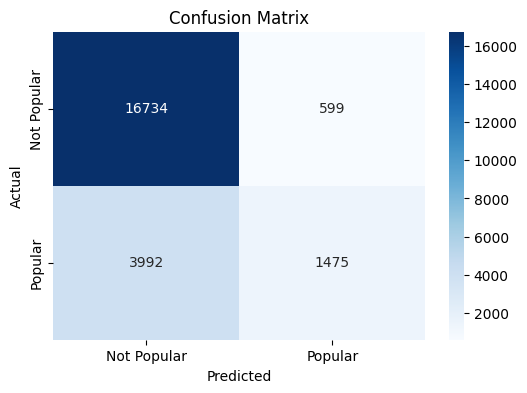

In [64]:
# Compute confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
